# Wine Quality Prediction

In [4]:
! pip install numpy
! pip install matplotlib
! pip install scipy
! pip install pandas
! pip install scikit-learn
! pip install seaborn



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics




In [6]:
# loading the dataset
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Preprocessing

In [10]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [11]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df.rename(columns={'quality': 'good-quality'}, inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good-quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Exploratory Data Analysis

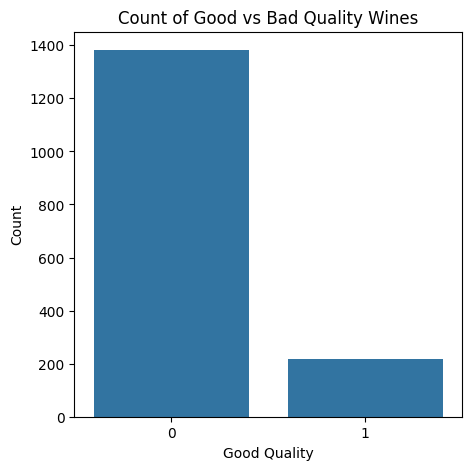

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(x='good-quality', data=df)
plt.xlabel('Good Quality')
plt.ylabel('Count')
plt.title('Count of Good vs Bad Quality Wines')
plt.show()

#### Analysis of coorelation between features

<Axes: >

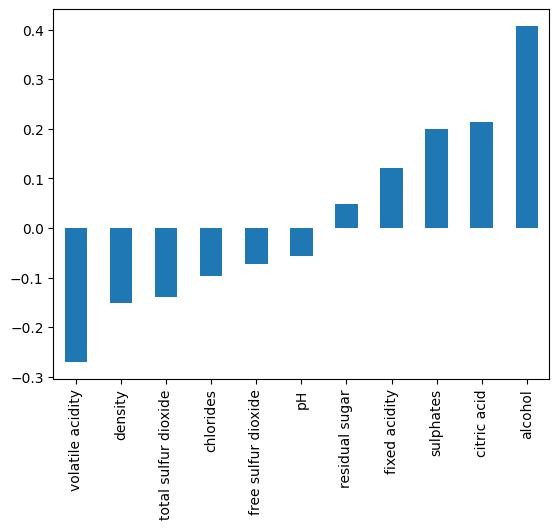

In [13]:
df.corr()['good-quality'][:-1].sort_values().plot(kind='bar')

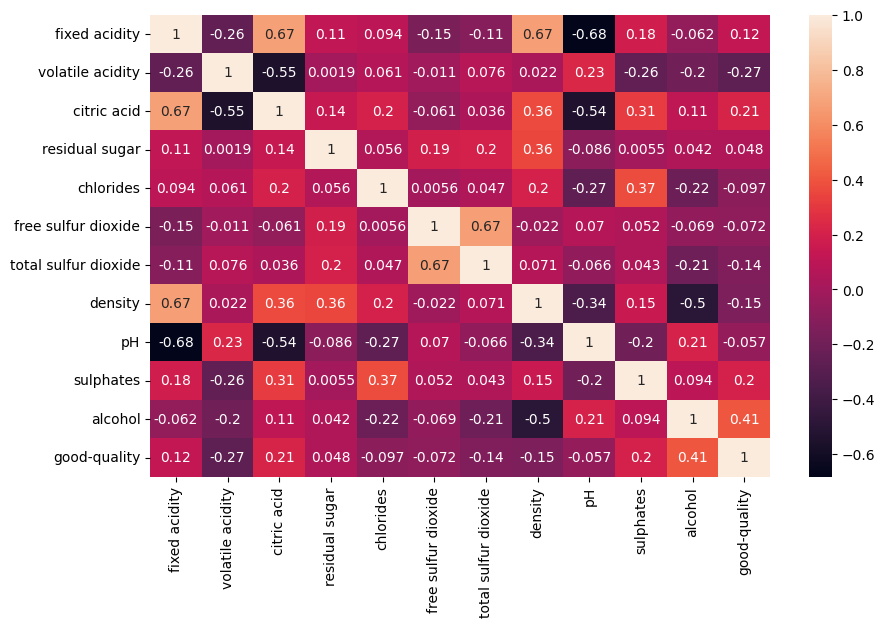

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: xlabel='residual sugar', ylabel='alcohol'>

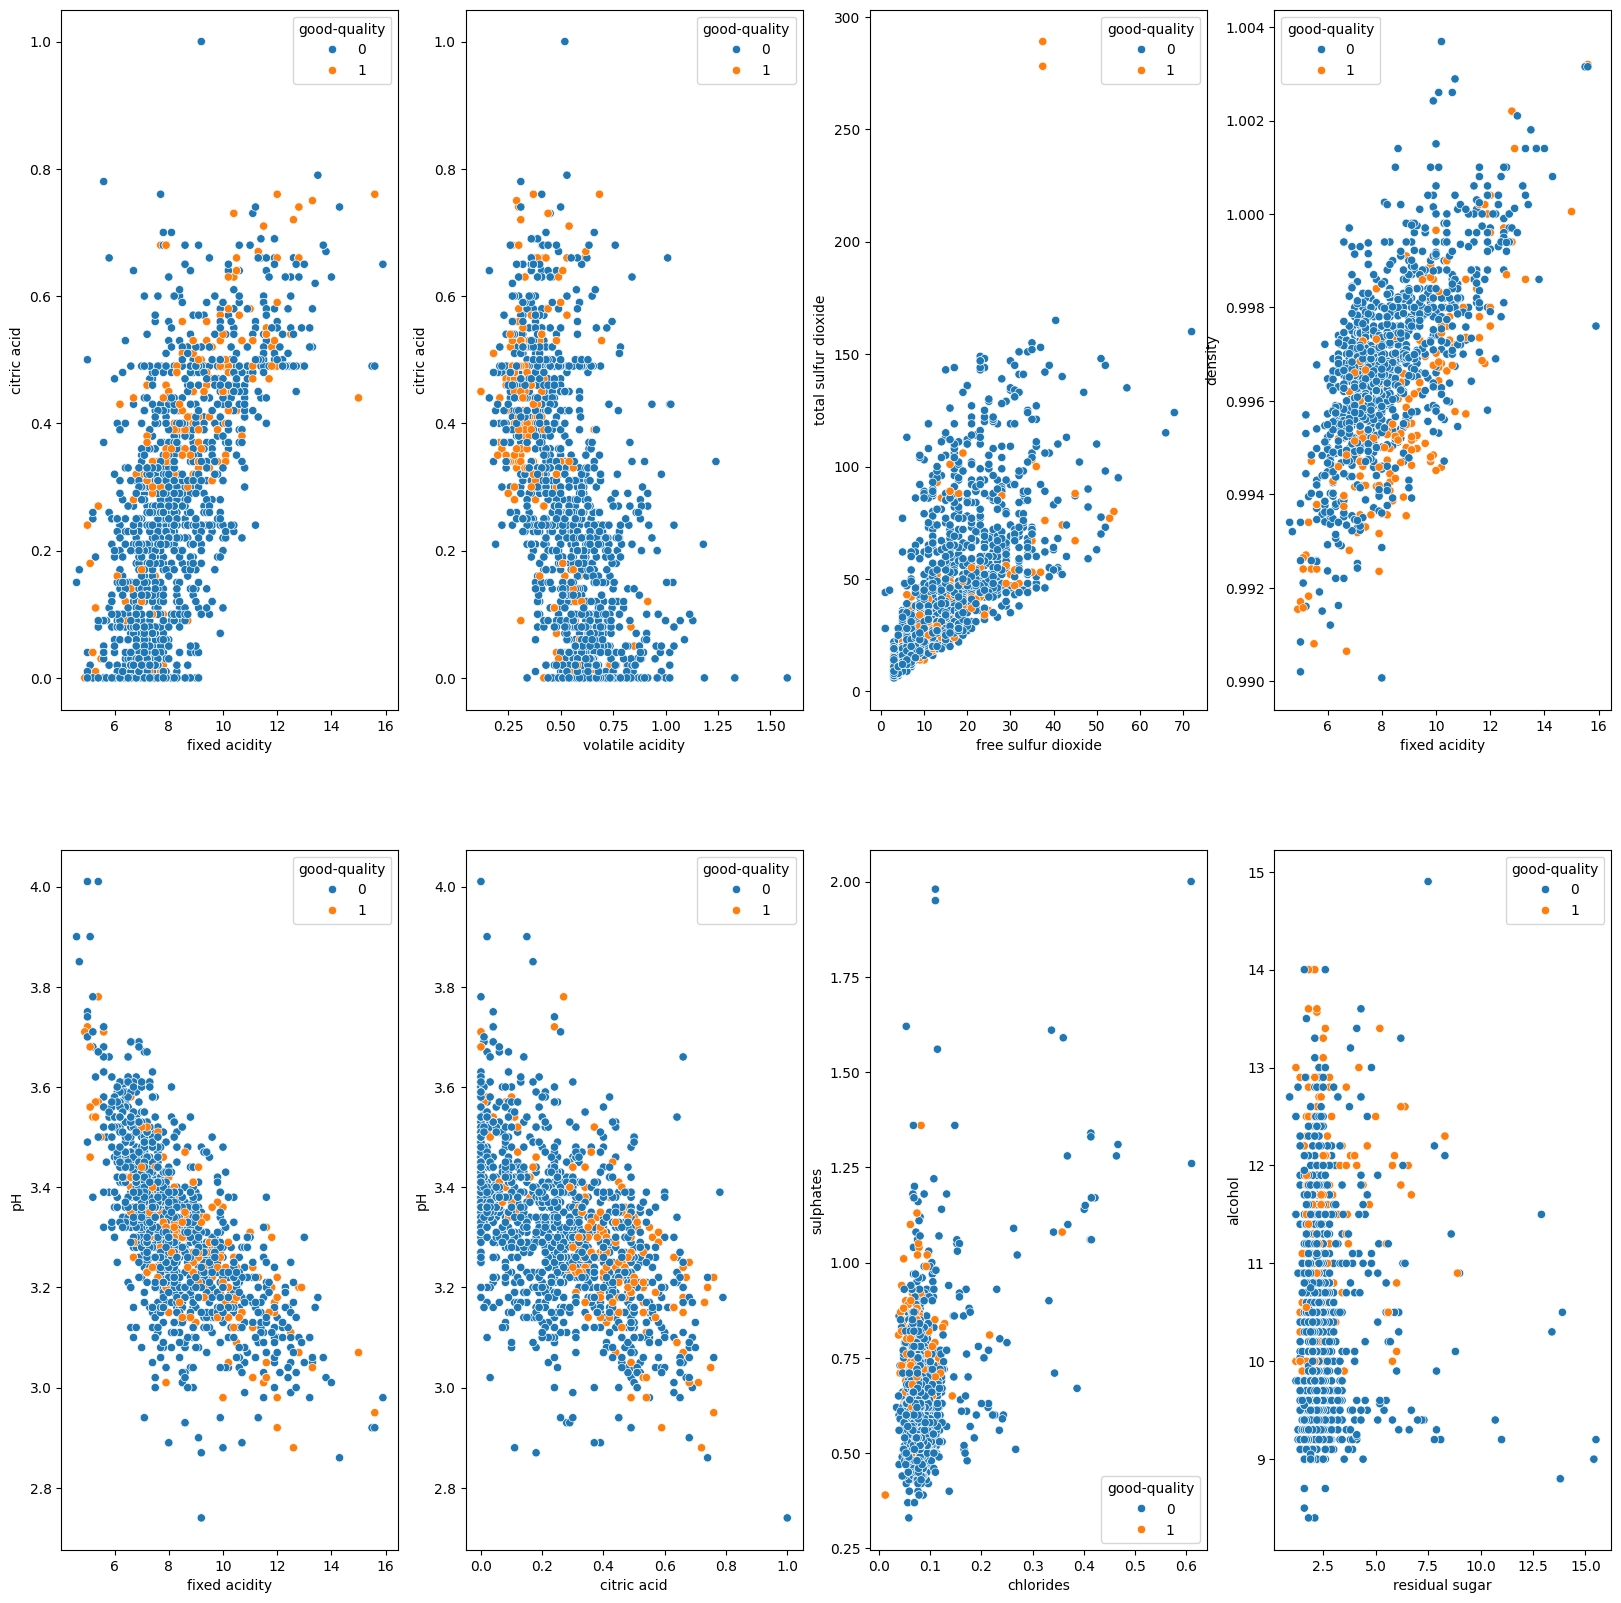

In [15]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.scatterplot(x = 'fixed acidity', y = 'citric acid', hue = 'good-quality', data = df, ax=ax[0,0])
sns.scatterplot(x = 'volatile acidity', y = 'citric acid', hue = 'good-quality', data = df, ax=ax[0,1])
sns.scatterplot(x = 'free sulfur dioxide', y = 'total sulfur dioxide', hue = 'good-quality', data = df, ax=ax[0,2])
sns.scatterplot(x = 'fixed acidity', y = 'density', hue = 'good-quality', data = df, ax=ax[0,3])
sns.scatterplot(x = 'fixed acidity', y = 'pH', hue = 'good-quality', data = df, ax=ax[1,0])
sns.scatterplot(x = 'citric acid', y = 'pH', hue = 'good-quality', data = df, ax=ax[1,1])
sns.scatterplot(x = 'chlorides', y = 'sulphates', hue = 'good-quality', data = df, ax=ax[1,2])
sns.scatterplot(x = 'residual sugar', y = 'alcohol', hue = 'good-quality', data = df, ax=ax[1,3])


## Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('good-quality', axis=1), df['good-quality'], test_size=0.3, random_state=42)

## Model Training

### Logistic Regression

In [17]:
lr = LogisticRegression()
lr


LogisticRegression()

In [18]:
# training the model
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

c:\Users\Siddh\Downloads\wine-pred\wd\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8856121537086684

In [19]:
# testing the model
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.8666666666666667

### Support Vector Machine (SVM)

In [20]:
clf = svm.SVC(kernel='rbf')
clf

SVC()

In [ ]:
# training the model
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8668453976764968

In [22]:
# testing the model
sv_pred = clf.predict(X_test)
accuracy_score(y_test, sv_pred)

0.8625

### Decision Tree

In [23]:
dtree = DecisionTreeClassifier()
dtree


DecisionTreeClassifier()

In [24]:
# training the model
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train)

1.0

In [25]:
# testing the model
tr_pred = dtree.predict(X_test)
accuracy_score(y_test, tr_pred)

0.8583333333333333

### K-Nearest Neighbors (KNN)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [27]:
# training the model
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9079535299374442

In [28]:
# testing the model
kn_pred = knn.predict(X_test)
accuracy_score(y_test, kn_pred)

0.8583333333333333

## Model Evaluation

### Logistic Regression

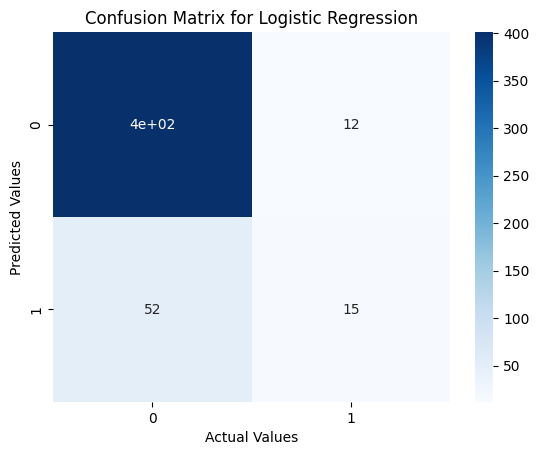

In [29]:
# logistic regression model evaluation
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [30]:
print('Logistic Regression Model Accuracy: ', accuracy_score(y_test, lr_pred))
print('Logistic Regression Model f1 score: ', metrics.f1_score(y_test, lr_pred))
print('Logistic Regression Model MAE: ', metrics.mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))


Logistic Regression Model Accuracy:  0.8666666666666667
Logistic Regression Model f1 score:  0.3191489361702128
Logistic Regression Model MAE:  0.13333333333333333
Logistic Regression Model RMSE:  0.3651483716701107


### Support Vector Machine (SVM)

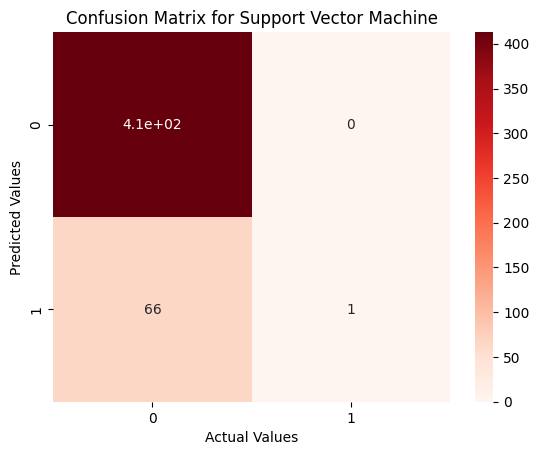

In [31]:
sns.heatmap(confusion_matrix(y_test, sv_pred), annot=True, cmap='Reds')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

In [39]:
print('Support Vector Machine Model Accuracy: ', accuracy_score(y_test, sv_pred))
print('Support Vector Machine Model f1 score: ', metrics.f1_score(y_test, sv_pred))
print('Support Vector Machine Model MAE: ', metrics.mean_absolute_error(y_test, sv_pred))
print('Support Vector Machine Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, sv_pred)))

Support Vector Machine Model Accuracy:  0.8625
Support Vector Machine Model f1 score:  0.029411764705882353
Support Vector Machine Model MAE:  0.1375
Support Vector Machine Model RMSE:  0.37080992435478316


### Decision Tree

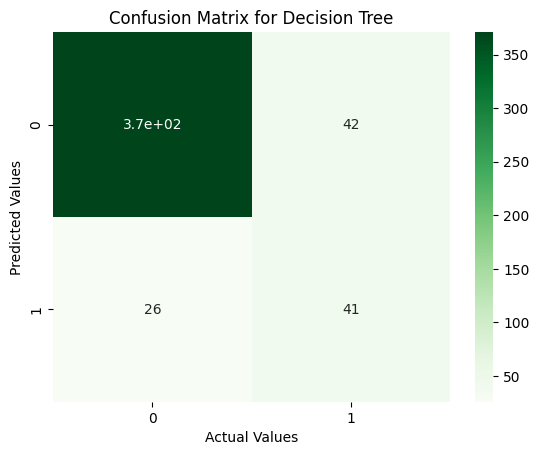

In [33]:
sns.heatmap(confusion_matrix(y_test, tr_pred), annot=True, cmap='Greens')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [34]:
print('Decision Tree Model Accuracy: ', accuracy_score(y_test, tr_pred))
print('Decision Tree Model f1 score: ', metrics.f1_score(y_test, tr_pred))
print('Decision Tree Model MAE: ', metrics.mean_absolute_error(y_test, tr_pred))
print('Decision Tree Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, tr_pred)))

Decision Tree Model Accuracy:  0.8583333333333333
Decision Tree Model f1 score:  0.5466666666666666
Decision Tree Model MAE:  0.14166666666666666
Decision Tree Model RMSE:  0.3763863263545405


### K-Nearest Neighbors (KNN)

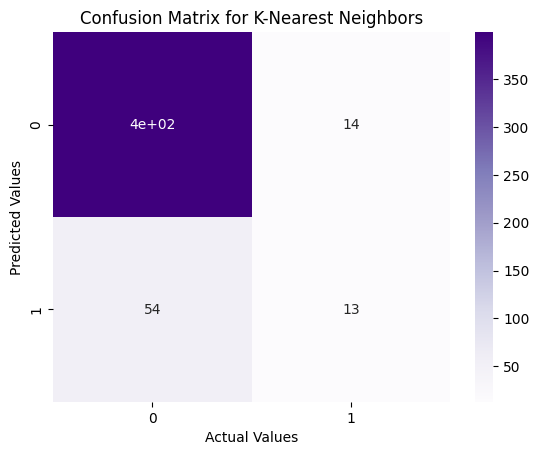

In [35]:
sns.heatmap(confusion_matrix(y_test, kn_pred), annot=True, cmap='Purples')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()

In [36]:
print('K-Nearest Neighbors Model Accuracy: ', accuracy_score(y_test, kn_pred))
print('K-Nearest Neighbors Model f1 score: ', metrics.f1_score(y_test, kn_pred))
print('K-Nearest Neighbors Model MAE: ', metrics.mean_absolute_error(y_test, kn_pred))
print('K-Nearest Neighbors Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, kn_pred)))

K-Nearest Neighbors Model Accuracy:  0.8583333333333333
K-Nearest Neighbors Model f1 score:  0.2765957446808511
K-Nearest Neighbors Model MAE:  0.14166666666666666
K-Nearest Neighbors Model RMSE:  0.3763863263545405


### Model Comparison

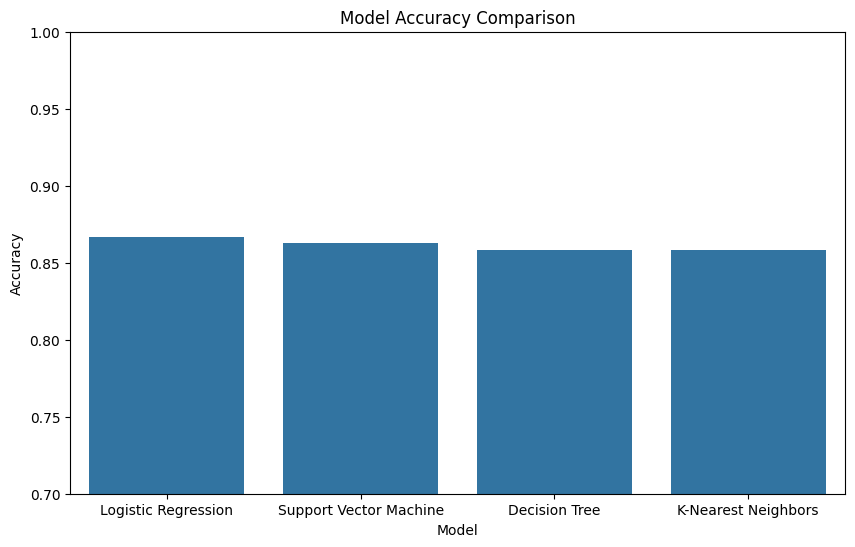

In [37]:
models = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K-Nearest Neighbors']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, sv_pred), accuracy_score(y_test, tr_pred), accuracy_score(y_test, kn_pred)]
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.show()

## Conclusion

It is observed that the Logistic Regression model performs the best on the test set with an accuracy of 86.67%. The model can predict the quality of the wine based on the given features with an accuracy of 86.67%.